In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from IPython.display import display
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [271]:
test_data = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_labels.csv")
train_data = pd.read_csv("train.csv")
test_merged = pd.merge(test_data, test_labels,on='id')

In [272]:
headers = train_data.columns.values[2:]

total_size = train_data.shape[0]
count = {
    "total_size": train_data.shape[0],
    "total_toxic": 0,
    "total_severe_toxic": 0,
    "total_obscene": 0,
    "total_threat": 0,
    "total_insult": 0,
    "total_identity_hate": 0,
    "total_clear": 0,
}

for ind in train_data.index:
    is_clear = True
        
    for header in headers:
        if train_data[header][ind] > 0:
            count_header_name = 'total_' + header
            count[count_header_name] += 1
            
            is_clear = False

    if is_clear:
        count['total_clear'] += 1

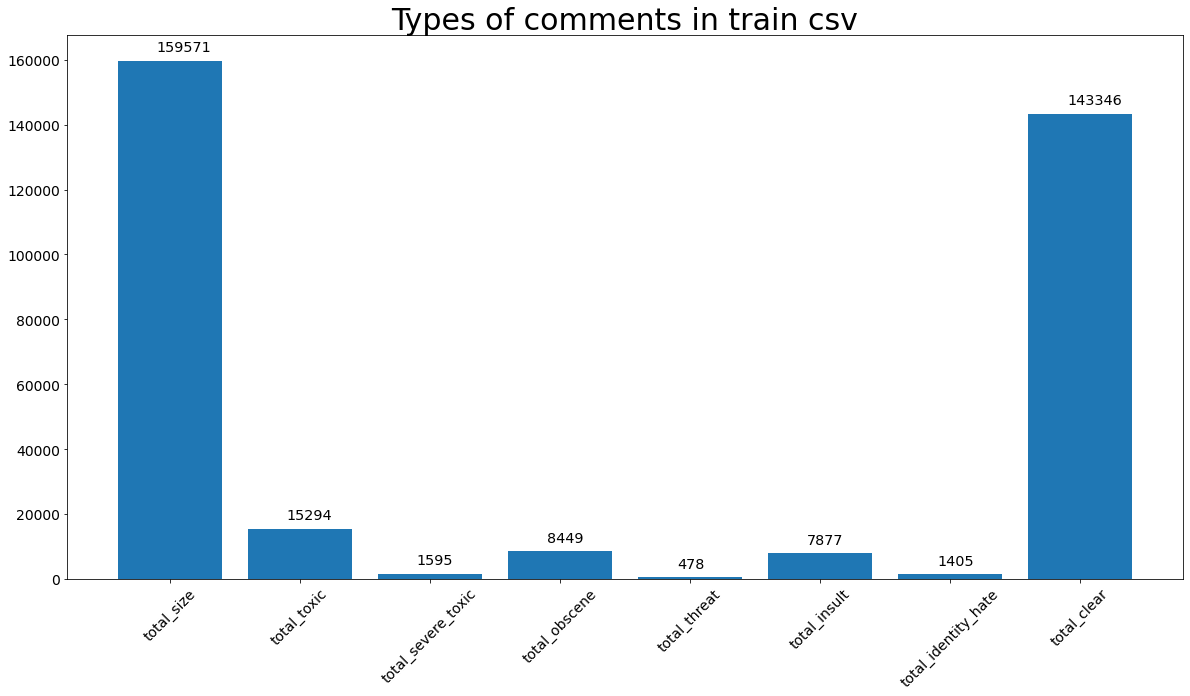

In [273]:
plt.figure(figsize=(20,10))
plt.bar(count.keys(), count.values())
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Types of comments in train csv', fontsize=30)

for index, value in enumerate(count.values()):
    plt.text(index - 0.1, value + 3000, str(value), fontsize='x-large')

,comment_type,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
1,severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
2,obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
3,threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
4,insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
5,identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


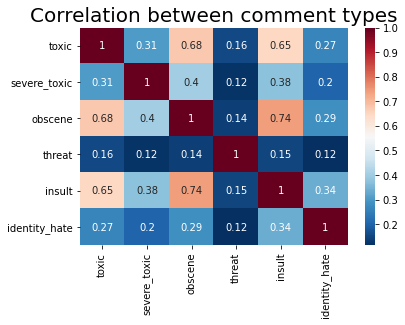

In [274]:
correlation = {
    "comment_type":[],
    "toxic": [],
    "severe_toxic": [],
    "obscene": [],
    "threat": [],
    "insult": [],
    "identity_hate": []
}

for header in headers:
    correlation['comment_type'].append(header)
    for second_header in headers:
        correlation[second_header].append(train_data[header].corr(train_data[second_header]))

df_correlation = pd.DataFrame(correlation)
display(df_correlation)

df_correlation = df_correlation.drop('comment_type', axis=1)
sns.heatmap(df_correlation, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, annot=True, cmap = "RdBu_r")
plt.title('Correlation between comment types', fontsize = 20)
plt.show()

In [275]:
print("TF IDF per comment type")
for header in headers:
    comment_type_data = train_data.loc[train_data[header] == 1]

    tvec = TfidfVectorizer(min_df=.0025, stop_words='english', strip_accents='unicode', analyzer='word', max_features=1000)
    tvec_weights = tvec.fit_transform(comment_type_data['comment_text'])
    weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
    print("Comment type: " + header)
    display(weights_df.sort_values(by='weight', ascending=False).head(25))

TF IDF per comment type
Comment type: toxic


,term,weight
365,fuck,0.048554
369,fucking,0.027905
531,like,0.025065
962,wikipedia,0.024403
286,don,0.023051
493,just,0.021927
788,shit,0.020961
644,page,0.020670
838,stop,0.017783
505,know,0.016876


Comment type: severe_toxic


,term,weight
309,fuck,0.121331
317,fucking,0.057208
109,bitch,0.042105
714,suck,0.038581
668,shit,0.037263
73,ass,0.030283
75,asshole,0.028726
218,dick,0.028243
195,cunt,0.027097
277,faggot,0.023548


Comment type: obscene


,term,weight
357,fuck,0.074229
364,fucking,0.042188
768,shit,0.029312
131,bitch,0.025861
825,suck,0.025560
94,ass,0.023765
520,like,0.023383
937,wikipedia,0.022646
280,don,0.022110
484,just,0.020487


Comment type: threat


,term,weight
236,die,0.060658
461,kill,0.054482
332,fucking,0.040469
328,fuck,0.038878
353,going,0.037050
72,ass,0.027702
406,hope,0.026299
496,ll,0.024089
249,don,0.023890
716,shit,0.023484


Comment type: insult


,term,weight
341,fuck,0.064564
348,fucking,0.037663
121,bitch,0.025839
762,shit,0.024854
510,like,0.024574
818,suck,0.022986
929,wikipedia,0.022942
86,ass,0.021321
265,don,0.021245
815,stupid,0.020961


Comment type: identity_hate


,term,weight
376,gay,0.058507
361,fuck,0.050249
329,faggot,0.037820
367,fucking,0.037186
641,nigger,0.035319
550,like,0.026239
796,shit,0.026194
100,ass,0.021855
136,bitch,0.021444
675,people,0.016455


In [276]:
print("TF IDF per all comment types")
toxic_data = train_data[(train_data['toxic'] == 1) | (train_data['severe_toxic'] == 1) | (train_data['obscene'] == 1) |
                       (train_data['threat'] == 1) | (train_data['insult'] == 1) | (train_data['identity_hate'] == 1)]

tvec = TfidfVectorizer(min_df=.0025, stop_words='english', strip_accents='unicode', analyzer='word', max_features=1000)
tvec_weights = tvec.fit_transform(toxic_data['comment_text'])
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
display(weights_df.sort_values(by='weight', ascending=False).head(25))

TF IDF per all comment types


,term,weight
364,fuck,0.046758
368,fucking,0.027060
525,like,0.025474
963,wikipedia,0.024501
286,don,0.023212
489,just,0.022261
639,page,0.021098
785,shit,0.020430
837,stop,0.017628
499,know,0.017223
